In [326]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import astropy as py
import pyspeckit
import astropy.units as u
import pandas as pd

from iminuit.cost import LeastSquares
from iminuit import Minuit

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.modeling.models import custom_model
from astropy.modeling.fitting import LevMarLSQFitter
from astropy import constants
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.stats import akaike_info_criterion

from scipy import constants as const
from scipy import optimize
from scipy.stats import chisquare
from scipy.stats import norm
from scipy.stats import gaussian_kde

from RegscorePy.aic import aic

from spectral_cube import SpectralCube

from pvextractor import extract_pv_slice, Path, PathFromCenter

from pyspeckit.cubes.mapplot import MapPlotter

%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize'] = 'xx-large'
plt.rcParams['ytick.labelsize'] = 'xx-large'
plt.rcParams.update({"text.usetex": False,
                     "font.family": "serif",
                     'xtick.direction': 'out',
                     'ytick.direction': 'in'})

my_figsize = (5, 5)

vlsr = 8.3

In [123]:
rms = fits.getdata('Documents/B335/data/B335_N2H+_10_v1_rms.fits')
rms_clean = []

for i in range(len(rms[1])) :
    for j in range(len(rms[0])) :
    
        if np.isnan(rms[i][j]).any() == False:
    
            rms_clean.append(rms[i][j])


In [124]:
rms_clean /= beam.jtok( freq_line).value 

In [120]:
beam.jtok(freq_line)

<Quantity 22.10686063 K>

In [125]:
import statistics

statistics.mean(rms_clean)

0.0079438565

In [92]:
from radio_beam import Beam

header = fits.getheader(file_cube)
data = fits.getdata(file_cube)
beam = Beam.from_fits_header(header)

data /= beam.jtok( freq_line).value

In [327]:
def load_myCube( file_in):
    cube = pyspeckit.Cube(file_in)
    cube.xarr.refX = freq_line
    cube.xarr.velocity_convention = 'radio'
    cube.xarr.convert_to_unit('km/s')
    return cube

In [328]:
file_cube = 'Documents/B335/data/B335_N2H+_10_K_v1.fits'

freq_line = rest_freq = 93.1737000 * u.GHz

Cube = SpectralCube.read(file_cube)#.with_spectral_unit(u.km/u.s, velocity_convention='radio', 
                                                 # rest_value=rest_freq)

cube = load_myCube(file_cube)
cube.Registry.add_fitter('n2hp_vtau', pyspeckit.models.n2hp.n2hp_vtau_fitter, 4)


Cube is a Stokes cube, returning spectral cube for I component
Cube is a Stokes cube, returning spectral cube for I component


In [329]:
x = xpix = 226
y = ypix = 223
Spec = cube.get_spectrum(ypix,xpix)

In [340]:
snr_min = 5.
F = False
T = True

# range of parameters
vmin = 7.5; vmax = 10
tpeak_min = 0; tpeak_max = 500e-3
dv_min = 0.05; dv_max = 6.0

In [354]:
guesses=[100, 0.1, 8.2, 0.1, 200, 0.1, 9, 0.1]
#guesses=[7.0, 2.0, 8.3, 0.1]

Spec.specfit(fittype='n2hp_vtau', guesses=guesses,
             limitedmin=[T,F,T,T,T,F,T,T],
             limitedmax=[T,F,T,T,T,F,T,T],
             fixed = [F,T,F,F,F,T,F,F],
             minpars=[ 0.1, 0.1, vmin, 0.05, 0.1, 0.1, vmin, 0.05],
             maxpars=[270, 0.1, vmax, 1.0, 270.0, 0.1, vmax, 1.0])

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


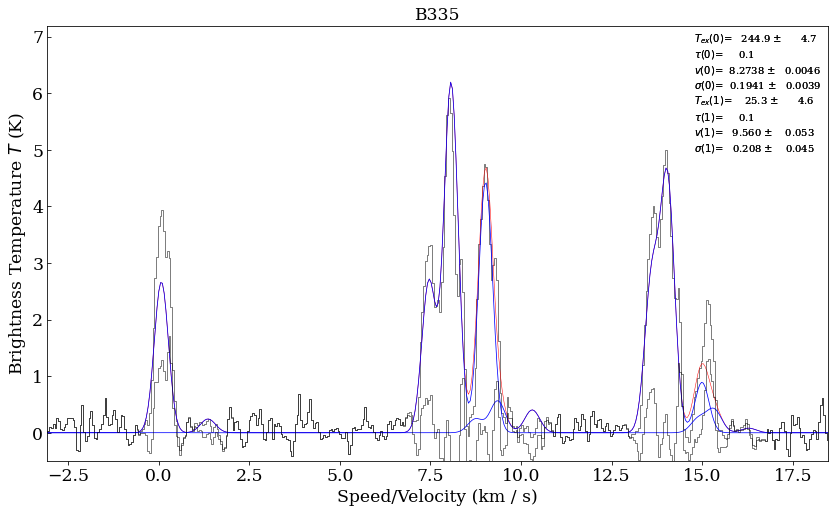

In [355]:
Spec.plotter()
Spec.specfit.plot_fit()
Spec.specfit.plot_components()
Spec.specfit.plotresiduals(axis=Spec.plotter.axis, clear=False, label=False)

In [38]:
file_1comp_thick = 'Documents/B335/B335_N2Hp_v1_thick_fitted_parameters_snr3.fits'
file_2comp_thick = 'Documents/B335/B335_N2Hp_v1_thick_fitted_parameters_2comp_3snr.fits'

file_1comp_thin = 'Documents/B335/B335_N2Hp_v1_thin_fitted_parameters_snr3.fits'
file_2comp_thin = 'Documents/B335/B335_N2Hp_v1_thin_fitted_parameters_2comp_3snr.fits'

In [39]:
data_1comp_thick, hd_1comp_thick = fits.getdata(file_1comp_thick, header=True)
data_2comp_thick, hd_2comp_thick = fits.getdata(file_2comp_thick, header=True)

data_1comp_thin, hd_1comp_thin = fits.getdata(file_1comp_thin, header=True)
data_2comp_thin, hd_2comp_thin = fits.getdata(file_2comp_thin, header=True)

In [40]:
freq_dict_cen ={
                'J1-0':  93173.7637e6,
               }

voff_lines_dict={
    ####### J 1-0
    'J1-0_01': -7.9930,
    'J1-0_02': -7.9930,
    'J1-0_03': -7.9930,
    'J1-0_04': -0.6112,
    'J1-0_05': -0.6112,
    'J1-0_06': -0.6112,
    'J1-0_07': 0.0000,
    'J1-0_08': 0.9533,
    'J1-0_09': 0.9533,
    'J1-0_10': 5.5371,
    'J1-0_11': 5.5371,
    'J1-0_12': 5.5371,
    'J1-0_13': 5.9704,
    'J1-0_14': 5.9704,
    'J1-0_15': 6.9238,
    }

line_strength_dict = {
    ####### J 1-0
    'J1-0_01': 0.025957,
    'J1-0_02': 0.065372,
    'J1-0_03': 0.019779,
    'J1-0_04': 0.004376,
    'J1-0_05': 0.034890,
    'J1-0_06': 0.071844,
    'J1-0_07': 0.259259,
    'J1-0_08': 0.156480,
    'J1-0_09': 0.028705,
    'J1-0_10': 0.041361,
    'J1-0_11': 0.013309,
    'J1-0_12': 0.056442,
    'J1-0_13': 0.156482,
    'J1-0_14': 0.028705,
    'J1-0_15': 0.037038,
}

# Get frequency dictionary in Hz based on the offset velocity and rest frequency
conv_J10=u.doppler_radio(freq_dict_cen['J1-0']*u.Hz)
freq_dict = {
    name: ((voff_lines_dict[name]*u.km/u.s).to(u.Hz, equivalencies=conv_J10).value) for name in voff_lines_dict.keys() if "J1-0" in name
    }

# relative_strength_total_degeneracy is not used in the CLASS implementation
# of the hfs fit. It is the sum of the degeneracy values for all hyperfines
# for a given line; it gives the relative weights between lines.
# Hyperfine weights are treated as normalized within one rotational transition.
w10 = sum(val for name,val in line_strength_dict.items() if 'J1-0' in name)
relative_strength_total_degeneracy = {
    name : w10 for name  in line_strength_dict.keys() if "J1-0" in name
    }
# Get the list of line names from the previous lists
line_names = [name for name in voff_lines_dict.keys()]

n2hp_vtau = pyspeckit.models.hyperfine.hyperfinemodel(line_names, voff_lines_dict, freq_dict,
                                     line_strength_dict,
                                     relative_strength_total_degeneracy)

In [41]:
def chi2(y_data, y_model, err) :
    return np.sum(np.square(y_data - y_model)/err**2)

def AIC(chi2_low, chi2_high, Delta_k = 4.) :
    return 2*Delta_k + chi2_low - chi2_high

In [42]:
chi2_1comp=chi2(Cube[:, x, y].value, n2hp_vtau(Cube.spectral_axis,
                                             data_1comp_thick[0, x, y],
                                             data_1comp_thick[1, x, y],
                                             data_1comp_thick[2, x, y],
                                             data_1comp_thick[3, x, y]), rms[x, y])

In [43]:
chi2_2comp=chi2(Cube[:,x, y].value, (n2hp_vtau(Cube.spectral_axis,
                                             data_2comp_thick[0, x, y],
                                             data_2comp_thick[1, x, y],
                                             data_2comp_thick[2, x, y],
                                             data_2comp_thick[3, x, y]) + 
                                    n2hp_vtau(Cube.spectral_axis,
                                             data_2comp_thick[4, x, y],
                                             data_2comp_thick[5, x, y],
                                             data_2comp_thick[6, x, y],
                                             data_2comp_thick[7, x, y])), rms[x, y])

In [44]:
AIC(chi2_2comp, chi2_1comp)

-377.08635392625024

In [45]:
x = 250
y = 250

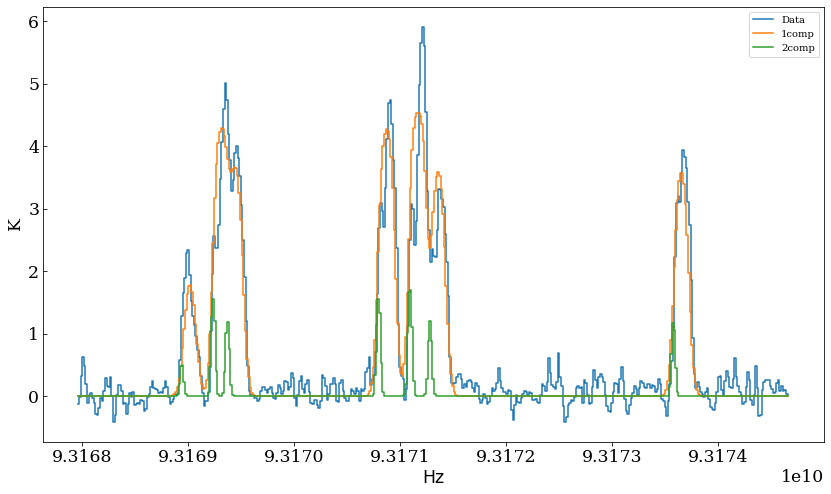

In [308]:
test_1st = n2hp_vtau(Cube.spectral_axis,
                     data_1comp_thick[0, x, y],
                     data_1comp_thick[1, x, y],
                     data_1comp_thick[2, x, y],
                     data_1comp_thick[3, x, y])


test_2nd = (n2hp_vtau(Cube.spectral_axis,
                     data_2comp_thick[4, x, y],
                     data_2comp_thick[5, x, y],
                     data_2comp_thick[6, x, y],
                     data_2comp_thick[7, x, y])  )
          #+ n2hp_vtau(Cube.spectral_axis,
                  #  data_2comp_thick[4, x, y],
                  #  data_2comp_thick[5, x, y],
                  #  data_2comp_thick[6, x, y],
                   # data_2comp_thick[7, x, y]))


Cube[:,xpix,ypix].quicklook(label = 'Data')

plt.step(Cube.spectral_axis.value,test_1st, label = '1comp')
plt.step(Cube.spectral_axis.value,test_2nd, label = '2comp')
plt.legend()

In [47]:
mask = fits.getdata('Documents/B335/data/B335_N2H+_10_v1_mask.fits')

In [309]:
zoom_size = 450

#bestparam = [[[] for j in range(250)] for i in range(250)]
Image = np.zeros(shape=(zoom_size, zoom_size))
bestparam = np.zeros(shape=(16, zoom_size, zoom_size))
i_zoom = 0
j_zoom = 0

for n in range(zoom_size):
    
    i = n + i_zoom

    for p in range(zoom_size):
        
        j = p + j_zoom
        
        if mask[i, j] == 1 and data_1comp_thin[0, i, j] > 0.11:
        
            chi2_0comp=chi2(Cube[:, i, j].value, 0, rms[i, j])
        
            chi2_1comp=chi2(Cube[:, i, j].value, n2hp_vtau(Cube.spectral_axis,
                                                 data_1comp_thin[0, i, j],
                                                 data_1comp_thin[1, i, j],
                                                 data_1comp_thin[2, i, j],
                                                 data_1comp_thin[3, i, j]), rms[i, j])
        
        
            aic_test1 = AIC(chi2_1comp, chi2_0comp, Delta_k=4.)
        
            if aic_test1 < -10 : 
            
            #1 comp model better than 0 comp model 
            
                bestparam[0:4, n, p] = data_1comp_thin[0:4, i, j]
                bestparam[8:12, n, p] = data_1comp_thin[4:8, i, j]
            
                Image[n, p] = 1
            
                chi2_2comp=chi2(Cube[:,i, j].value, (n2hp_vtau(Cube.spectral_axis,
                                                 data_2comp_thin[0, i, j],
                                                 data_2comp_thin[1, i, j],
                                                 data_2comp_thin[2, i, j],
                                                 data_2comp_thin[3, i, j]) + 
                                       n2hp_vtau(Cube.spectral_axis,
                                                 data_2comp_thin[4, i, j],
                                                 data_2comp_thin[5, i, j],
                                                 data_2comp_thin[6, i, j],
                                                 data_2comp_thin[7, i, j])), rms[i, j])
            
                aic_test2 = AIC(chi2_2comp, chi2_1comp, Delta_k=4.)
                
            
                if aic_test2 < -10 and data_2comp_thin[0, i, j] > 0.11 and data_2comp_thin[4, i, j] > 0.11 and np.abs(data_2comp_thin[6, i, j] - data_2comp_thin[2, i, j]) > 0.1 :
                
                #2 comp model better than 1 comp model 
                
                    bestparam[0:8, n, p] = data_2comp_thin[0:8, i, j]
                    bestparam[8:16, n, p] = data_2comp_thin[8:16, i, j]
                
                    Image[n, p] = 2

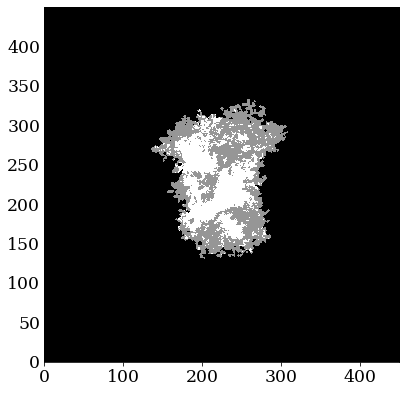

In [310]:
import matplotlib.cm as cm
fig = plt.figure()
ax2 = fig.add_subplot(121)
ax2.imshow(Image, interpolation='nearest', cmap=cm.Greys_r)
ax2.invert_yaxis()
#plt.ylim(25,175)
#plt.xlim(50, 175)
#plt.ylim(180,190)
#plt.xlim(50, 60)

In [311]:
Line_width_blue = bestparam[0, :, :] * np.nan
Vel_blue = bestparam[0, :, :] * np.nan 
Tex_blue = bestparam[0, :, :] * np.nan
Tau_blue = bestparam[0, :, :] * np.nan
overlaps = 0

for i in range(zoom_size) : 
    
    for j in range(zoom_size) :
    
        if 8.01 < bestparam[2, i, j] < 8.3 :
            
            Line_width_blue[i, j] = bestparam[3, i, j]
            Vel_blue[i, j] = bestparam[2, i, j]
            Tau_blue[i, j] = bestparam[1, i, j]
            Tex_blue[i, j] = bestparam[0, i, j]
                
        if Image[i, j] == 2.0 :
            
            if 8.01 < bestparam[6, i, j] < 8.3 :
                    
                if (bestparam[2, i, j] < vlsr and bestparam[6, i, j] > bestparam[2, i, j]) or bestparam[2, i, j] > vlsr :     
                    
                    if bestparam[:, i, j].all() != 0.0 :
                        
                        Line_width_blue[i, j] = bestparam[7, i, j]
                        Vel_blue[i, j] = bestparam[6, i, j]
                        Tau_blue[i, j] = bestparam[5, i, j]
                        Tex_blue[i, j] = bestparam[4, i, j]
                    
                if 8.01 < bestparam[2, i, j] < 8.3 :
                        
                    overlaps +=1
                        
                        

In [312]:
print(overlaps)

148


In [324]:
Line_width_red = bestparam[0, :, :] * np.nan
Vel_red = bestparam[0, :, :] * np.nan 
Tau_red = bestparam[0, :, :] * np.nan
Tex_red = bestparam[0, :, :] * np.nan
overlaps = 0

for i in range(zoom_size) : 
    
    for j in range(zoom_size) :
        
        if 8.8 > bestparam[2, i, j] > 8.3 :
            
            Line_width_red[i, j] = bestparam[3, i, j]
            Vel_red[i, j] = bestparam[2, i, j]
            Tau_red[i, j] = bestparam[1, i, j]
            Tex_red[i, j] = bestparam[0, i, j]
            
        if Image[i, j] == 2.0 :
                
            if 8.8 > bestparam[6, i, j] > 8.3 :
                
                if (bestparam[2, i, j] > 8.3 and bestparam[4, i, j] < bestparam[0, i, j]) or bestparam[2, i, j] < 8.3:
                    
                    Line_width_red[i, j] = bestparam[7, i, j]
                    Vel_red[i, j] = bestparam[6, i, j]
                    Tau_red[i, j] = bestparam[5, i, j]
                    Tex_red[i, j] = bestparam[4, i, j]
                
                if 8.75 > bestparam[2, i, j] > 8.3 :
                    
                    overlaps +=1

In [325]:
overlaps

1510

In [216]:
overlaps = 0

for i in range(zoom_size) : 
    
    for j in range(zoom_size) :
        
        if Image[i, j] == 2.0:
            
            if 9 > bestparam[6, i, j] > 8.3 and 9 > bestparam[2, i, j] > 8.3 :
                
                overlaps +=1
                print(i, j)

138 252
138 255
156 221
161 193
162 186
162 187
163 186
166 186
167 188
167 192
168 186
168 187
168 189
169 173
169 181
169 182
169 186
169 187
169 188
169 189
169 196
169 197
169 198
169 199
170 174
170 181
170 182
170 187
170 188
170 197
171 200
171 201
171 202
171 203
171 204
172 200
172 201
172 202
172 203
172 204
172 208
172 276
173 174
173 175
173 176
173 180
173 181
173 188
173 200
173 201
173 202
173 208
173 209
173 275
174 174
174 176
174 177
174 178
174 179
174 180
174 181
174 182
174 183
174 187
174 188
174 192
174 193
174 195
174 198
174 199
174 201
174 202
174 203
174 204
174 205
174 206
174 207
174 208
174 209
174 210
174 275
175 181
175 188
175 192
175 193
175 196
175 200
175 201
175 202
175 203
175 204
175 205
175 206
175 207
175 208
175 209
175 210
175 211
175 213
176 192
176 193
176 196
176 198
176 201
176 202
176 203
176 204
176 206
176 207
176 208
176 209
176 210
176 211
176 214
176 215
176 216
176 275
177 192
177 193
177 194
177 195
177 201
177 203
177 204
177 205


233 191
233 227
233 228
233 229
233 230
233 231
233 232
233 233
233 234
233 242
233 243
233 246
233 247
233 248
233 249
233 250
233 251
234 181
234 182
234 185
234 228
234 229
234 231
234 232
234 233
234 234
234 236
234 244
234 245
234 248
234 249
234 250
234 251
235 183
235 186
235 229
235 230
235 232
235 233
235 234
235 235
235 236
235 238
235 239
235 242
235 244
235 249
235 250
235 251
235 252
236 188
236 229
236 230
236 231
236 232
236 233
236 235
236 236
236 239
236 240
236 241
236 242
236 243
236 244
236 248
236 249
236 250
236 251
236 252
237 188
237 230
237 231
237 232
237 233
237 237
237 238
237 239
237 240
237 241
237 243
237 244
237 245
237 246
237 247
237 248
237 249
237 250
237 251
237 252
238 208
238 231
238 232
238 233
238 238
238 239
238 241
238 243
238 244
238 245
238 246
238 247
238 248
238 249
238 250
238 251
238 252
239 180
239 208
239 209
239 232
239 233
239 236
239 242
239 244
239 245
239 246
239 247
239 248
239 249
239 250
239 251
239 252
240 180
240 206
240 208


276 276
276 277
276 278
276 279
276 282
277 172
277 173
277 174
277 175
277 176
277 177
277 179
277 180
277 203
277 204
277 205
277 206
277 209
277 213
277 214
277 215
277 218
277 222
277 223
277 224
277 225
277 227
277 230
277 231
277 232
277 233
277 236
277 237
277 238
277 239
277 240
277 241
277 242
277 243
277 245
277 252
277 253
277 254
277 255
277 258
277 259
277 263
277 264
277 266
277 267
277 269
277 271
277 272
277 273
277 274
277 276
277 277
277 278
277 282
277 283
277 284
278 171
278 172
278 173
278 174
278 175
278 176
278 177
278 180
278 190
278 193
278 194
278 195
278 196
278 197
278 205
278 206
278 208
278 209
278 210
278 211
278 213
278 214
278 215
278 216
278 217
278 218
278 223
278 224
278 229
278 231
278 236
278 238
278 239
278 240
278 241
278 242
278 244
278 251
278 252
278 253
278 254
278 255
278 257
278 258
278 259
278 260
278 261
278 262
278 265
278 266
278 267
278 268
278 269
278 270
278 271
278 272
278 273
278 274
278 276
278 280
278 282
278 283
278 284
278 294


In [231]:
data_2comp_thick[:, 198, 223].all() != 0.00

False

In [53]:
Line_width_other = bestparam[0, :, :] * np.nan
Vel_other = bestparam[0, :, :] * np.nan 
Tex_other = bestparam[0, :, :] * np.nan

for i in range(zoom_size) : 
    
    for j in range(zoom_size) :
        
        if bestparam[3, i, j] != Line_width_blue[i, j] and bestparam[3, i, j] != Line_width_red[i, j] :
            
            Line_width_other[i, j] = bestparam[3, i, j]
            Vel_other[i, j] = bestparam[2, i, j]
            Tex_other[i, j] = bestparam[0, i, j]
            
        if Image[i, j] == 2.0 :
            
            if bestparam[7, i, j] != Line_width_blue[i, j] and bestparam[7, i, j] != Line_width_red[i, j] :
                    
                Line_width_other[i, j] = bestparam[7, i, j]
                Vel_other[i, j] = bestparam[6, i, j]
                Tex_other[i, j] = bestparam[4, i, j]
                    

In [54]:
file_dv_N2Hp_width_red = 'Documents/B335/B335_N2Hp_3snr_width_red.fits'
file_dv_N2Hp_width_blue = 'Documents/B335/B335_N2Hp_3snr_width_blue.fits'
file_vc_N2Hp_vlsr_red = 'Documents/B335/B335_N2Hp_vlsr_3snr_vel_red.fits'
file_vc_N2Hp_vlsr_blue = 'Documents/B335/B335_N2Hp_vlsr_3snr_vel_blue.fits'
file_vc_N2Hp_vlsr_other = 'Documents/B335/B335_N2Hp_vlsr_3snr_vel_other.fits'
file_dv_N2Hp_width_other = 'Documents/B335/B335_N2Hp_3snr_width_other.fits'

file_tau_N2Hp_red = 'Documents/B335/B335_N2Hp_3snr_tau_red.fits'
file_tau_N2Hp_blue = 'Documents/B335/B335_N2Hp_3snr_tau_blue.fits'

In [323]:
file_par = 'Documents/B335/B335_N2Hp_v1_thick_fitted_parameters_2comp_3snr.fits'
data, hd = fits.getdata(file_par, header=True)
hd_2d = hd.copy()
key_list = ['NAXIS3', 'CRPIX3', 'SPECSYS', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3']
for key_i in key_list:
    hd_2d.remove(key_i)
hd_2d['NAXIS'] = 2
hd_2d['WCSAXES'] = 2
hd_2d['BITPIX'] = 8
hd_2d['BUNIT'] = 'km/s'

data[:,:,:] = 0.0

snr_min = 3.

for n in range(zoom_size) : 
    
    i = n + i_zoom
    
    for p in range(zoom_size) :
        
        j = p + j_zoom
        
       # if Tex_blue[n, p] > snr_min * rms[n, p] :   
            
        data[5, i, j] = np.abs(Line_width_blue[n, p])
        data[4, i, j] = Vel_blue[n, p]
        data[3, i, j] = Tau_blue[n, p]
        
        #if Tex_red[n, p] > snr_min * rms[n, p] : 
            
        data[2, i, j] = np.abs(Line_width_red[n, p])
        data[1, i, j] = Vel_red[n, p]
        data[0, i, j] = Tau_red[n, p]
        
        #if Tex_other[n, p] > snr_min * rms[n, p] : 
            
        data[7, i, j] = np.abs(Line_width_other[n, p])
        data[6, i, j] = Vel_other[n, p]

fits.writeto(file_dv_N2Hp_width_red, np.squeeze(data[2,:,:]), hd_2d, overwrite=True)
fits.writeto(file_dv_N2Hp_width_blue, np.squeeze(data[5,:,:]), hd_2d, overwrite=True)
fits.writeto(file_vc_N2Hp_vlsr_red, np.squeeze(data[1,:,:]), hd_2d, overwrite=True)
fits.writeto(file_vc_N2Hp_vlsr_blue, np.squeeze(data[4,:,:]), hd_2d, overwrite=True)

fits.writeto(file_tau_N2Hp_blue, np.squeeze(data[3,:,:]), hd_2d, overwrite=True)
fits.writeto(file_tau_N2Hp_red, np.squeeze(data[0,:,:]), hd_2d, overwrite=True)


fits.writeto(file_dv_N2Hp_width_other, np.squeeze(data[7,:,:]), hd_2d, overwrite=True)
fits.writeto(file_vc_N2Hp_vlsr_other, np.squeeze(data[6,:,:]), hd_2d, overwrite=True)

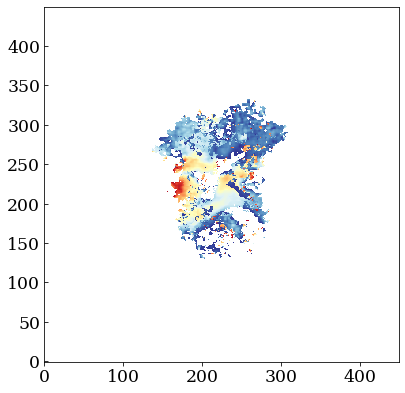

In [321]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.imshow(Vel_red, interpolation='nearest', cmap=cm.RdYlBu_r)
ax2.invert_yaxis()
#plt.ylim(135,150)
#plt.xlim(135, 150)


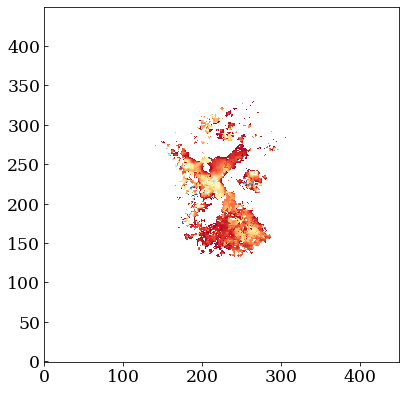

In [295]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.imshow(Vel_blue, interpolation='nearest', cmap=cm.RdYlBu_r)
ax2.invert_yaxis()

In [58]:
11am thursday

SyntaxError: invalid syntax (3506914164.py, line 1)